# Appendix C: batch norm can increase sensitivity to learning rate

Load training data (loss and accuracy) from pandas dataframe and plot using seaborn

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

import os
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [2]:
df_bn_lre2_lss = pd.read_pickle('df/df_ep200_bnTrue_lr1e-02_lss')
df_bn_lre3_lss = pd.read_pickle('df/df_ep200_bnTrue_lr1e-03_lss')
df_bn_lre2_acc = pd.read_pickle('df/df_ep200_bnTrue_lr1e-02_acc')
df_bn_lre3_acc = pd.read_pickle('df/df_ep200_bnTrue_lr1e-03_acc')

df_un_lre2_lss = pd.read_pickle('df/df_ep200_bnFalse_lr1e-02_lss')
df_un_lre3_lss = pd.read_pickle('df/df_ep200_bnFalse_lr1e-03_lss')
df_un_lre2_acc = pd.read_pickle('df/df_ep200_bnFalse_lr1e-02_acc')
df_un_lre3_acc = pd.read_pickle('df/df_ep200_bnFalse_lr1e-03_acc')

/export/mlrg/gallowaa/anaconda2-5.1/envs/torch-py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


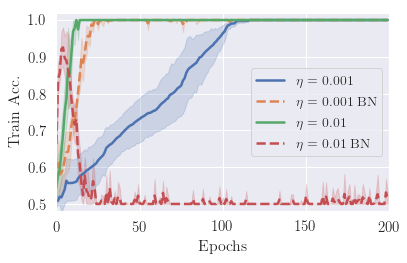

In [3]:
fontsize=16
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x='variable', y='value', data=df_un_lre3_acc, label=r'$\eta=0.001$')
ax = sns.lineplot(x='variable', y='value', data=df_bn_lre3_acc, label=r'$\eta=0.001$ BN')
ax = sns.lineplot(x='variable', y='value', data=df_un_lre2_acc, label=r'$\eta=0.01$')
ax = sns.lineplot(x='variable', y='value', data=df_bn_lre2_acc, label=r'$\eta=0.01$ BN')

ax.lines[1].set_linestyle("--")
ax.lines[3].set_linestyle("--") # dashed lines = BN

ax.set_xlabel('Epochs', fontsize=fontsize)
ax.set_ylabel('Train Acc.', fontsize=fontsize)
ax.tick_params(labelsize=fontsize-1)
ax.set_xlim(0, 200)
ax.set_ylim(0.48, 1.02)
ax.legend(fontsize=fontsize-2)
plt.tight_layout()
fig = ax.get_figure()
#fig.savefig('adversarial_spheres_2d_train_acc_sns.png')

/export/mlrg/gallowaa/anaconda2-5.1/envs/torch-py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


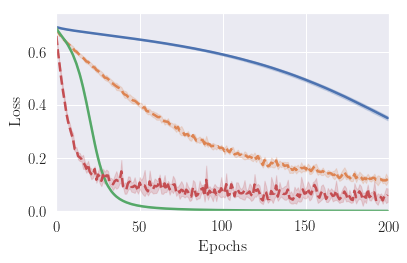

In [4]:
fontsize=16
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x='variable', y='value', data=df_un_lre3_lss)
ax = sns.lineplot(x='variable', y='value', data=df_bn_lre3_lss)
ax = sns.lineplot(x='variable', y='value', data=df_un_lre2_lss)
ax = sns.lineplot(x='variable', y='value', data=df_bn_lre2_lss)

ax.lines[1].set_linestyle("--")
ax.lines[3].set_linestyle("--") # dashed lines = BN

ax.set_xlabel('Epochs', fontsize=fontsize)
ax.set_ylabel('Loss', fontsize=fontsize)
ax.tick_params(labelsize=fontsize-1)
ax.set_xlim(0, 200)
ax.set_ylim(0, 0.75)
plt.tight_layout()
fig = ax.get_figure()
#fig.savefig('adversarial_spheres_2d_train_lss_sns.png')